In [31]:
import os
import json
from tqdm import tqdm

print("开始加载分析集结果")
# data_path_result = os.environ.get('HOME') + "/cook-data/recipe_corpus_stats_origin.jsonl"
data_path_result = os.environ.get('HOME') + "/cook-data/recipe_corpus_ana_stats.jsonl"
f1 = open(data_path_result, 'r', encoding='utf-8')
result = []
for line in tqdm(f1.readlines()):
    result_line = json.loads(line)
    result.append(result_line["__dj__stats__"])
print("加载分析结果集结束")
print("分析结果集大小：", len(result))
result[0]

开始加载分析集结果


100%|██████████| 1049218/1049218 [00:04<00:00, 214309.86it/s]

加载分析结果集结束
分析结果集大小： 1049218


{'alnum_ratio': 1.0,
 'char_rep_ratio': 0.0,
 'lang': 'zh',
 'lang_score': 0.9015420675,
 'perplexity': 5107.6,
 'text_len': 7}

In [32]:
import pandas as pd
df = pd.DataFrame(result)
df.head()

,alnum_ratio,char_rep_ratio,lang,lang_score,perplexity,text_len
0,1.0,0.0,zh,0.901542,5107.6,7
1,1.0,0.0,zh,0.851976,7772.0,8
2,1.0,0.0,zh,0.764956,9754.6,8
3,1.0,0.0,zh,0.834716,8572.6,8
4,1.0,0.0,zh,0.875503,3468.7,9


In [33]:
describe = df.describe()

In [34]:
from matplotlib import pyplot as plt

def plot_hist(df, column_name, max_label, step):
    label_count = [0] * int(max_label / step)
    x_list = [i for i in range(int(max_label / step))]
    x_list = [i * step for i in x_list]
    for i in tqdm(range(len(df))):
        if int(df[column_name][i]) < max_label:
            label_count[int(df[column_name][i]/step)] += 1
        else:
            label_count[-1] += 1
    print("label_count: ",label_count)
    print("sum of label_count: ", sum(label_count))
    plt.bar(x_list, label_count)
    plt.xlabel(column_name)
    plt.ylabel("count")
    plt.xlim(0, max_label)
    plt.tight_layout()
    plt.show()

In [35]:
def analyze_result(df, column_name, max_label, step):
    print(column_name + " mean: ", describe[column_name]["mean"])
    print(column_name + " std: ", describe[column_name]["std"])
    print(column_name + " 3-σ left: ", describe[column_name]["mean"] - 3 * describe[column_name]["std"])
    print(column_name + " 3-σ right: ", describe[column_name]["mean"] + 3 * describe[column_name]["std"])
    plot_hist(df, column_name, max_label, step)

alnum_ratio mean:  0.9476834410476381
alnum_ratio std:  0.08095315905960093
alnum_ratio 3-σ left:  0.7048239638688354
alnum_ratio 3-σ right:  1.1905429182264409


100%|██████████| 1049218/1049218 [00:07<00:00, 136101.65it/s]


label_count:  [1, 4, 25, 67, 202, 1372, 6167, 52352, 207305, 781723]
sum of label_count:  1049218


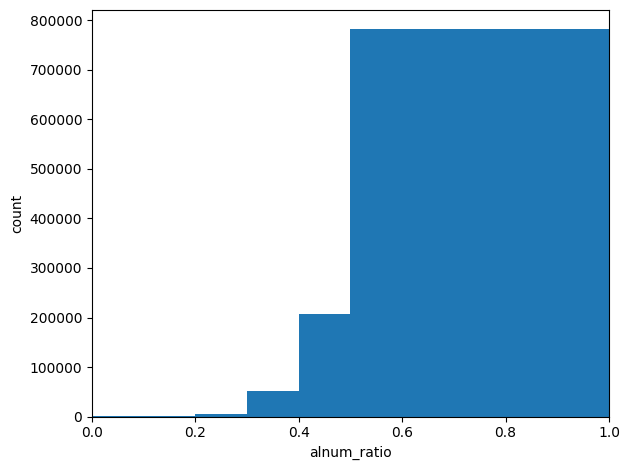

In [36]:
analyze_result(df, "alnum_ratio", 1, 0.1)

char_rep_ratio mean:  5.75554869054858e-07
char_rep_ratio std:  0.0005059035826255438
char_rep_ratio 3-σ left:  -0.0015171351930075765
char_rep_ratio 3-σ right:  0.0015182863027456861


100%|██████████| 1049218/1049218 [00:11<00:00, 94876.43it/s]


label_count:  [1049217, 0, 0, 0, 0, 1, 0, 0, 0, 0]
sum of label_count:  1049218


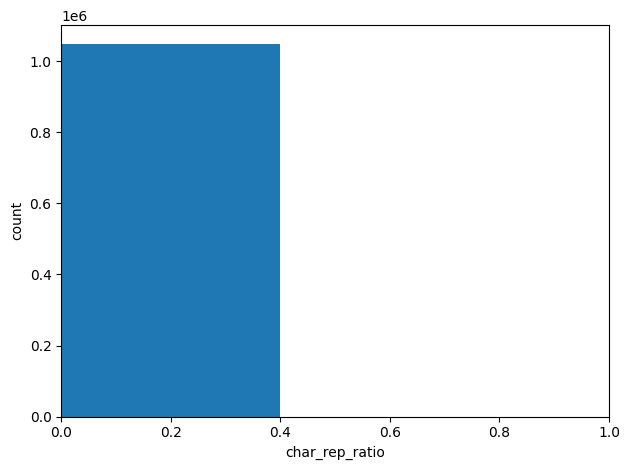

In [37]:
analyze_result(df, "char_rep_ratio", 1, 0.1)

lang_score mean:  0.69501130108211
lang_score std:  0.23730469817962302
lang_score 3-σ left:  -0.016902793456759158
lang_score 3-σ right:  1.406925395620979


100%|██████████| 1049218/1049218 [00:10<00:00, 103833.07it/s]


label_count:  [876, 22817, 57079, 72038, 83836, 122872, 122091, 130844, 156628, 280137]
sum of label_count:  1049218


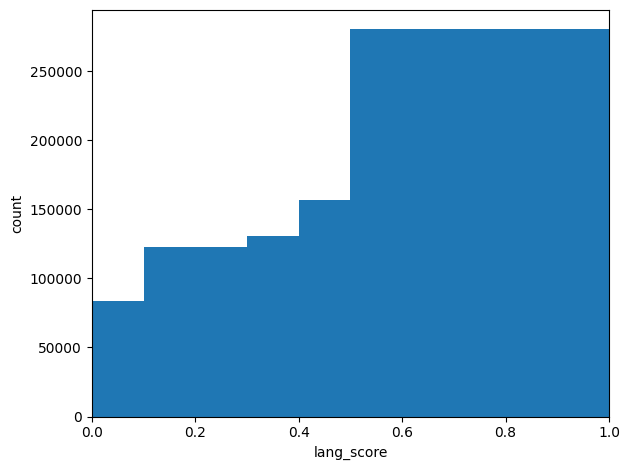

In [38]:
analyze_result(df, "lang_score", 1, 0.1)

perplexity mean:  3151.61250750559
perplexity std:  4718.027128022071
perplexity 3-σ left:  -11002.468876560624
perplexity 3-σ right:  17305.693891571806


100%|██████████| 1049218/1049218 [00:12<00:00, 84797.44it/s] 


label_count:  [272594, 294414, 165236, 95484, 58842, 38947, 26759, 19067, 14262, 10954, 8348, 6617, 5364, 4326, 3697, 2972, 2466, 2175, 1831, 14863]
sum of label_count:  1049218


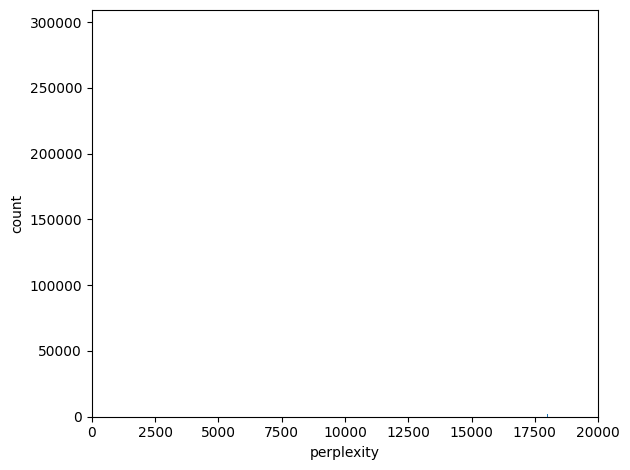

In [39]:
analyze_result(df, "perplexity", 20000, 1000)

text_len mean:  9.820425307228811
text_len std:  5.826108280705366
text_len 3-σ left:  -7.657899534887287
text_len 3-σ right:  27.29875014934491


100%|██████████| 1049218/1049218 [00:10<00:00, 101664.54it/s]


label_count:  [636736, 347851, 52378, 9108, 2024, 572, 261, 96, 63, 129]
sum of label_count:  1049218


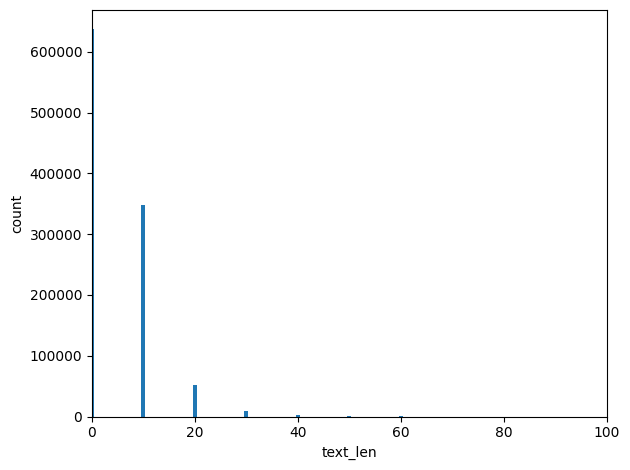

In [40]:
analyze_result(df, "text_len", 100, 10)

In [41]:
print("开始加载数据集")
# data juicer保存的输出文件是jsonl格式，这里需要逐行读取
data_path_juicer = os.environ.get('HOME') + "/cook-data/recipe_corpus_dedup.jsonl"
f1 = open(data_path_juicer, 'r', encoding='utf-8')
json_data = []
for line in tqdm(f1.readlines()):
    json_data.append(json.loads(line))
f1.close()
print("加载数据集结束")

开始加载数据集


100%|██████████| 1049218/1049218 [00:18<00:00, 56387.44it/s]


加载数据集结束


In [42]:
count_dict = {}
for i in tqdm(range(len(df))):
    lang = df["lang"][i]
    if lang in count_dict:
        count_dict[lang] += 1
    else:
        count_dict[lang] = 1
print(count_dict)

100%|██████████| 1049218/1049218 [00:06<00:00, 162235.69it/s]

{'zh': 739289, 'ja': 192312, 'en': 49471, 'sr': 3319, 'ko': 9876, 'fi': 941, 'ur': 45, 'it': 6712, 'pt': 2337, 'de': 5267, 'vi': 1124, 'ru': 3285, 'hr': 340, 'tr': 2183, 'be': 43, 'sk': 54, 'fa': 1029, 'fr': 7975, 'as': 6, 'hu': 1471, 'wuu': 996, 'nl': 351, 'es': 3995, 'eo': 1062, 'el': 1403, 'ta': 672, 'mk': 803, 'ceb': 2329, 'pl': 1412, 'ca': 570, 'tt': 97, 'sh': 277, 'eu': 236, 'te': 82, 'ms': 266, 'cs': 425, 'he': 305, 'ml': 118, 'hy': 278, 'bg': 223, 'kn': 116, 'is': 31, 'sv': 654, 'id': 431, 'uk': 633, 'my': 294, 'mr': 114, 'la': 34, 'no': 204, 'ar': 233, 'als': 30, 'lo': 9, 'af': 27, 'war': 93, 'ast': 4, 'sq': 44, 'hi': 154, 'gl': 84, 'ilo': 27, 'uz': 40, 'ro': 511, 'et': 68, 'da': 223, 'lt': 241, 'pa': 57, 'bn': 38, 'br': 31, 'gu': 67, 'ia': 139, 'ka': 229, 'th': 279, 'jv': 9, 'tg': 21, 'si': 24, 'sl': 162, 'sco': 7, 'kk': 32, 'or': 14, 'yue': 111, 'nds': 60, 'fy': 2, 'tl': 45, 'cv': 11, 'oc': 100, 'an': 11, 'lrc': 1, 'bs': 23, 'ba': 16, 'az': 97, 'lv': 57, 'dv': 8, 'nn': 24, '

In [43]:
lang_list_dict = {}
for i in tqdm(range(len(df))):
    lang = df["lang"][i]
    if lang not in lang_list_dict:
        lang_list_dict[lang] = []
    lang_list_dict[lang].append(i)

100%|██████████| 1049218/1049218 [00:06<00:00, 162597.56it/s]


In [44]:
n = 10
lang = 'en'
for i in range(n):
    print(json_data[lang_list_dict[lang][i]]['name'])

10寸披萨，鸡蛋面饼
零失败8寸蛋糕
抹茶色斑马戚风8寸蛋糕
“隔水法”8寸酸奶蛋糕，轻乳酪蛋糕的口感
BBQ烤鸡
BBQ烤鸡翅
BBQ烤鸡串
Q弹鸡蛋羹

杂


In [45]:
n = 10
m=0
for i in tqdm(range(len(df))):
    if df["perplexity"][i] > 20000:
        print(json_data[i]['name'])
        m += 1
    if m > n:
        break

  0%|          | 119/1049218 [00:00<00:08, 119065.40it/s]

6寸8寸10寸戚风蛋糕
红配绿4寸小蛋糕
6寸蛋糕坯
6寸蛋糕坯子
6寸蛋糕家用
古早6寸蛋糕
6寸蛋糕模面包
6寸蛋糕 古早味
6寸蛋糕胚+裱花（最简单的步骤）
戚风8寸蛋糕胚
8寸蛋糕裱花奶油
